Question 2 - Looking to buy in Melbourne? What location is best for you and your bank account?

Question 2 - Looking to buy in Melbourne? What location is best for you and your bank account?

Distance from CBD
            3 x Scatterplot between #Distance & #Price (1 per property type)
            Correlation coefficient
            Linear Regression
            Include linear regression line equation

Location
            Heat map of pricing across the city
            Using longitude and latitude values to create a scatterplot coloured by price
            Add Map as background

Target Demographics
            Single: Studios, Unit, Apartment
            Couples: Unit, Apartment, 2 bedroom house
            Small Family (1-2 kids): 3 bedroom apartment, House
            Larger Family (3+ kids): House with min of 3 bedrooms.

Property Type
            Bin the property types per demographic:
            Single -> (['Type': 'u', 't'], [Bedrooms : <=2])
            Couples -> (['Type' : 'u', 't', 'h'], ['Bedrooms' : 2])
            Small Family -> (['Type' : 'u', 't', 'h'], ['Bedrooms' : 2, 3]) 
            Larger Family -> (['Type' :'h'], ['Bedrooms' : >= 3]) 

Repeat the heat map of pricing 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
  

%matplotlib notebook


In [22]:
source_file = 'Properties of Melbourne City (CLEANED).csv'
source_file_df = pd.read_csv(source_file, low_memory=False)

In [23]:
source_file_df.shape
source_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [24]:
source_file_df["Is Dup"] = source_file_df.duplicated(subset=['Suburb', 'Address'], keep=False)
Duplicate_source_file_df = (source_file_df.loc[source_file_df["Is Dup"]==True])
display(Duplicate_source_file_df)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Is Dup
53,53,Airport West,50 Bedford St,3,h,730000,VB,Nelson,2016-03-12,13.5,...,1.0,0.0,145.0,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,True
54,54,Airport West,50 Bedford St,3,h,770000,SP,Nelson,2017-04-03,13.5,...,1.0,0.0,145.0,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,True
245,245,Altona North,21 Hatherley Gr,3,h,750000,SP,Jas,2017-04-03,11.1,...,3.0,554.0,NaN,NaN,Hobsons Bay,-37.84490,144.85000,Western Metropolitan,5132.0,True
263,263,Altona North,21 Hatherley Gr,3,h,700000,VB,Jas,2016-10-12,11.1,...,3.0,554.0,NaN,NaN,Hobsons Bay,-37.84490,144.85000,Western Metropolitan,5132.0,True
393,393,Ascot Vale,75 Maribyrnong Rd,6,h,2425000,PI,Brad,2016-04-06,5.9,...,2.0,1014.0,435.0,1887.0,Moonee Valley,-37.77210,144.91840,Western Metropolitan,6567.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18096,18096,Hampton East,3 Besant St,3,h,1280000,SP,Buxton,2017-08-26,13.8,...,3.0,658.0,NaN,NaN,NaN,-37.94259,145.03004,Southern Metropolitan,2356.0,True
18170,18170,Maidstone,88a Ballarat Rd,3,t,706000,S,Sweeney,2017-08-26,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,3873.0,True
18210,18210,Moonee Ponds,55 Pattison St,2,h,700000,VB,Nelson,2017-08-26,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,6232.0,True
18256,18256,Patterson Lakes,6 Balarang Ct,3,h,670000,S,hockingstuart,2017-08-26,31.2,...,3.0,NaN,104.0,NaN,NaN,-38.07868,145.14743,South-Eastern Metropolitan,3351.0,True


In [25]:
source_file_df['Type'].unique()

array(['h', 't', 'u'], dtype=object)

In [26]:
units_dataset_df = source_file_df[(source_file_df.Type=='u')]
print(units_dataset_df.tail())


       Unnamed: 0       Suburb             Address  Rooms Type   Price Method  \
18366       18366       Toorak  21/1059 Malvern Rd      2    u  720000     VB   
18367       18367       Toorak    25/637 Orrong Rd      2    u  631000     SP   
18369       18369  Tullamarine     3/32 Banksia Gr      2    u  530000      S   
18371       18371  Tullamarine      1/34 Sharps Rd      2    u  290000     VB   
18381       18381     Watsonia      2/14 Daours Ct      2    u  590000      S   

         SellerG        Date  Distance  ...  Car  Landsize  BuildingArea  \
18366     Beller  2017-08-26       4.1  ...  NaN       NaN           NaN   
18367     Jellis  2017-08-26       4.1  ...  1.0       NaN           1.0   
18369      Jason  2017-08-26      12.9  ...  1.0       NaN          86.0   
18371      Barry  2017-08-26      12.9  ...  1.0       NaN         109.0   
18381  Lindellas  2017-08-26      14.5  ...  1.0       NaN          83.0   

       YearBuilt  CouncilArea  Lattitude  Longtitude    

In [27]:
houses_dataset_df = source_file_df[(source_file_df.Type=='h')]
print(houses_dataset_df.tail())

       Unnamed: 0        Suburb        Address  Rooms Type    Price Method  \
18390       18390  Williamstown    83 Power St      3    h  1170000      S   
18392       18392  Williamstown   96 Verdon St      4    h  2500000     PI   
18393       18393     Yallambie   17 Amaroo Wy      4    h  1100000      S   
18394       18394    Yarraville     6 Agnes St      4    h  1285000     SP   
18395       18395    Yarraville  33 Freeman St      4    h  1050000     VB   

          SellerG        Date  Distance  ...  Car  Landsize  BuildingArea  \
18390       Raine  2017-08-26       6.8  ...  4.0     436.0           NaN   
18392     Sweeney  2017-08-26       6.8  ...  5.0     866.0         157.0   
18393  Buckingham  2017-08-26      12.7  ...  2.0       NaN           NaN   
18394     Village  2017-08-26       6.3  ...  1.0     362.0         112.0   
18395     Village  2017-08-26       6.3  ...  2.0       NaN         139.0   

       YearBuilt  CouncilArea  Lattitude  Longtitude             Reg

In [28]:
townhouses_dataset_df = source_file_df[(source_file_df.Type=='t')]
print(townhouses_dataset_df.tail())

       Unnamed: 0          Suburb          Address  Rooms Type    Price  \
18363       18363       Thornbury   323 Gillies St      4    t  1257000   
18365       18365       Thornbury    111 Pender St      2    t   858000   
18373       18373   Vermont South  308 Hawthorn Rd      3    t   931000   
18385       18385  West Footscray  1/21 Waratah St      2    t   655000   
18391       18391    Williamstown  8/2 Thompson St      2    t   622500   

      Method SellerG        Date  Distance  ...  Car  Landsize  BuildingArea  \
18363      S  Jellis  2017-08-26       7.0  ...  2.0       NaN           NaN   
18365      S  Jellis  2017-08-26       7.0  ...  NaN       NaN           NaN   
18373      S  Biggin  2017-08-26      17.2  ...  2.0       NaN         152.0   
18385      S     Jas  2017-08-26       6.4  ...  1.0       NaN         135.0   
18391     SP    Greg  2017-08-26       6.8  ...  1.0       NaN          89.0   

       YearBuilt  CouncilArea  Lattitude  Longtitude             Reg

In [29]:
def Type_C(source_file_df): 
    if (source_file_df['Type']=='u'): return 'C0'
    elif (source_file_df['Type']=='h'): return 'C1'
    elif (source_file_df['Type']=='t'): return 'C2'
                                               
source_file_df['Type_C']= source_file_df.apply(Type_C, axis=1)
source_file_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Is Dup,Type_C
0,0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,False,C1
1,1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,False,C1
2,2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,False,C1
3,3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,False,C1
4,4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,False,C1


In [30]:
source_file_df=source_file_df.drop(['Method', 'SellerG', 'Date', 'Landsize', 'BuildingArea', 'YearBuilt'], axis=1)
source_file_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Is Dup,Type_C
0,0,Abbotsford,85 Turner St,2,h,1480000,2.5,3067.0,2.0,1.0,1.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,False,C1
1,1,Abbotsford,25 Bloomburg St,2,h,1035000,2.5,3067.0,2.0,1.0,0.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,False,C1
2,2,Abbotsford,5 Charles St,3,h,1465000,2.5,3067.0,3.0,2.0,0.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,False,C1
3,3,Abbotsford,40 Federation La,3,h,850000,2.5,3067.0,3.0,2.0,1.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,False,C1
4,4,Abbotsford,55a Park St,4,h,1600000,2.5,3067.0,3.0,1.0,2.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,False,C1


In [31]:
source_file_df.to_csv('Cut1_Property Sales of Melbourne City.csv', index=False)

In [32]:
source_file_df=pd.DataFrame(source_file_df)
source_file_df.count()

Unnamed: 0       18396
Suburb           18396
Address          18396
Rooms            18396
Type             18396
Price            18396
Distance         18395
Postcode         18395
Bedroom2         14927
Bathroom         14925
Car              14820
CouncilArea      12233
Lattitude        15064
Longtitude       15064
Regionname       18395
Propertycount    18395
Is Dup           18396
Type_C           18396
dtype: int64

<IPython.core.display.Javascript object>


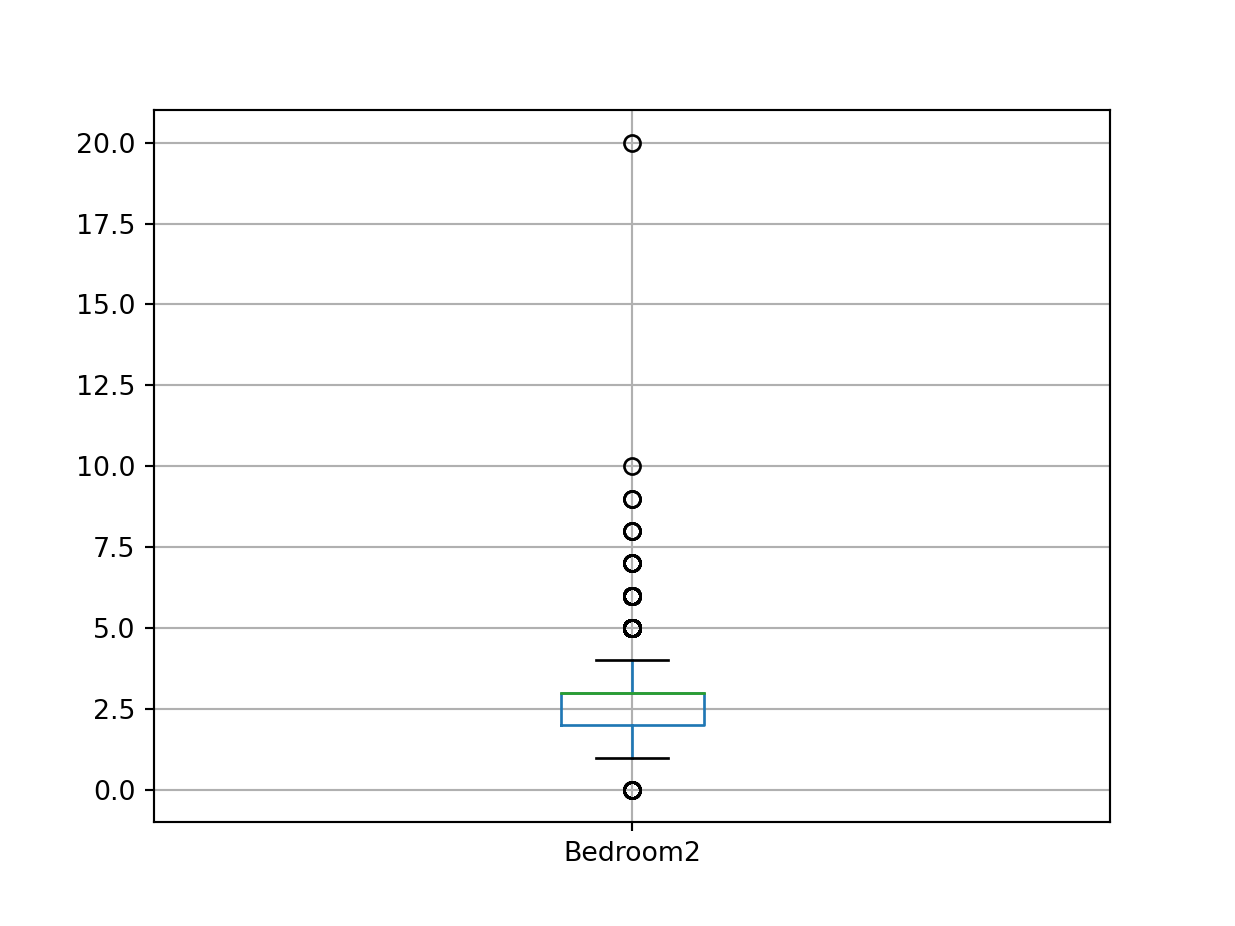

In [33]:
# Add Labels and tick graduation#
plt.figure1 = source_file_df.boxplot(column ='Bedroom2')
plt.show()

In [34]:
source_file_Type_df=source_file_df.copy()
source_file_Type_df=source_file_Type_df.filter(['Distance', 'Price','Type', 'Type_C'])
source_file_Type_df.head(5)

,Distance,Price,Type,Type_C
0,2.5,1480000,h,C1
1,2.5,1035000,h,C1
2,2.5,1465000,h,C1
3,2.5,850000,h,C1
4,2.5,1600000,h,C1


In [35]:
source_file_Location_Price=source_file_df.copy()
source_file_Location_Price=source_file_Location_Price.filter(['Longtitude','Lattitude', 'Type', 'Type_C', 'Price'])
source_file_Location_Price.head(5)

,Longtitude,Lattitude,Type,Type_C,Price
0,144.9984,-37.7996,h,C1,1480000
1,144.9934,-37.8079,h,C1,1035000
2,144.9944,-37.8093,h,C1,1465000
3,144.9969,-37.7969,h,C1,850000
4,144.9941,-37.8072,h,C1,1600000


In [36]:
source_file_Demographics_Location_Price=source_file_df.copy()
source_file_Demographics_Location_Price=source_file_Demographics_Location_Price.filter(['Longtitude','Lattitude', 'Price','Type', 'Type_C','Bedroom2'])
source_file_Demographics_Location_Price.head(5)

,Longtitude,Lattitude,Price,Type,Type_C,Bedroom2
0,144.9984,-37.7996,1480000,h,C1,2.0
1,144.9934,-37.8079,1035000,h,C1,2.0
2,144.9944,-37.8093,1465000,h,C1,3.0
3,144.9969,-37.7969,850000,h,C1,3.0
4,144.9941,-37.8072,1600000,h,C1,3.0


In [37]:
fig, (ax1, ax2, ax3) = plt.subplot(3, figsize=(11, 4), sharex=True)
x = source_file_Location_Price['Lattitude']
y = source_file_Location_Price['Longtitude']
s = source_file_Location_Price['Price']
c0 = source_file_Location_Price['Type_C']=="C0"
c1 = source_file_Location_Price['Type_C']=="C1"
c2 = source_file_Location_Price['Type_C']=="C2"
ax1.set_title=('Unit Pricing by location'); ax2.set_title=('House Pricing by location'); ax3.set_title=('Townhouse Pricing by locations')
ax1.set_xlabel=('Lattitude');  ax2.set_xlabel=('Lattitude'); ax3.set_xlabel=('Lattitude')  
ax1.set_ylabel=('Longtitude');  ax2.set_ylabel=('Longtitude'); ax3.set_ylabel=('Longtitude')
ax1.set_xlim(-37.5, -38.5) ;  ax2.set_xlim(-37.5, -38.5); ax3.set_xlim(-37.5, -38.5)   
ax1.set_ylim(143.8, 145.8);  ax2.set_ylim(143.8, 145.8),  ax3.set_ylim(143.8, 145.8)
ax1_data=source_file_Location_Price[source_file_Location_Price['Type_C']=='C0']
ax2_data=source_file_Location_Price[source_file_Location_Price['Type_C']=='C1']
ax3_data=source_file_Location_Price[source_file_Location_Price['Type_C']=='C2']
sns.scatterplot(x=x, y=y, s=s, c=c0, alpha=0.4, data='ax1_data', sizes=(30, 70), legend=False)
sns.scatterplot(x=x, y=y, s=s, c=c1, alpha=0.4,  data='ax2_data', sizes=(30, 30), legend=False)
sns.scatterplot(x=x, y=y, s=s, c=c2, alpha=0.4, data='ax3_data', sizes=(30, 30), legend=False)
plt.show()


ValueError: Single argument to subplot must be a three-digit integer, not 3